2022-12-06 16:00:38,319 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



FireFly (Sphere) [Best Pos Dim=2]:  [0.01811225384225232, 0.042460764517531585]
FireFly (Sphere) [Best Cos Dim=2]:  0.002130970262659453




pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.27e-42
2022-12-06 16:00:40,829 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2713538701387364e-42, best pos: [6.91619003e-22 1.33903586e-21]


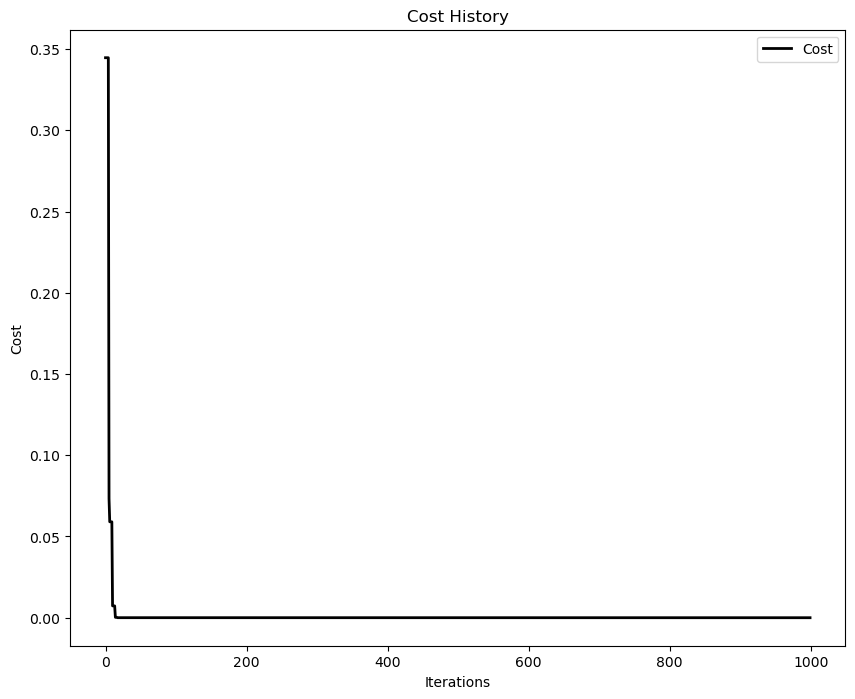

2022-12-06 16:00:44,645 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2022-12-06 16:00:44,648 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 1000x800 -depth 8 -delay 10.0 -loop 0 rgba:- -layers OptimizePlus Pyramid.gif


CalledProcessError: Command '['convert', '-size', '1000x800', '-depth', '8', '-delay', '10.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'Pyramid.gif']' died with <Signals.SIGKILL: 9>.

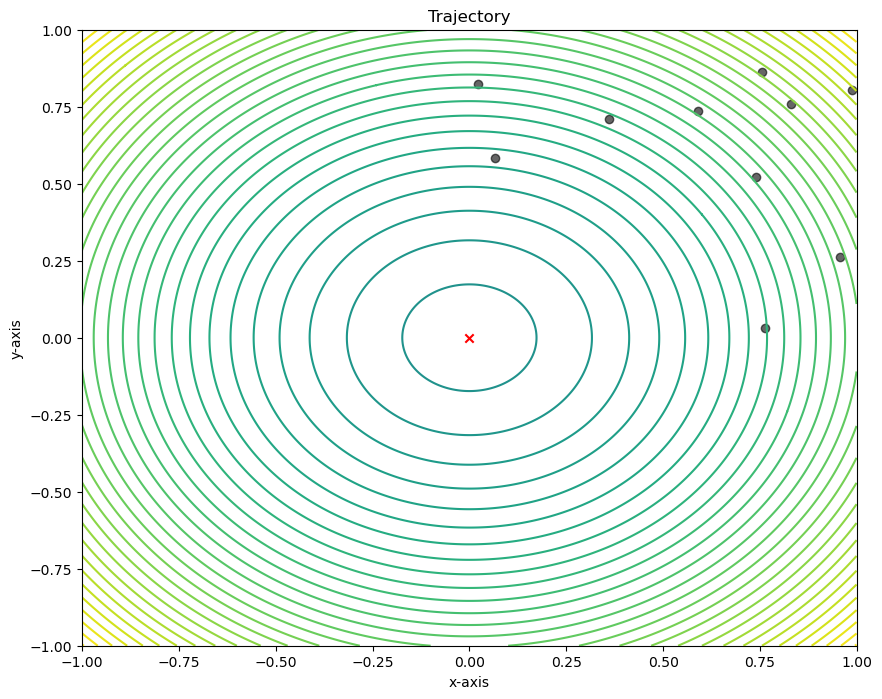

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Import SwearmPackagePy
import SwarmPackagePy
from SwarmPackagePy import testFunctions as tf

# ================================================================== SPHERE ================================================================== #
# Set-up hyperparameters
#c1 - cognitive parameter
#c2 - social parameter
#c3 - inertica parameter


options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# ================================================================== SPHERE -> Dim = 2 ================================================================== #
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)#A dimensao não é definida por nós, é a dimensao do problema

# Call Firefly Algorithm
alh = SwarmPackagePy.fa(10,tf.sphere_function, -5, 5, 2, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nFireFly (Sphere) [Best Pos Dim=2]: ",alh.get_Gbest()) #Retorna a melhor posição do algoritmo
print("FireFly (Sphere) [Best Cos Dim=2]: ",tf.sphere_function(alh.get_Gbest()))
#print("Agentes: ",alh.get_agents()) #Retorna um histórico de todos os agentes do algoritmo 
print("\n")


# Perform optimizations sphere
cost,pos = optimizer.optimize(fx.sphere, iters=1000)

# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,limits=[(-1,1), (-1,1)])

animation = plot_contour(pos_history=optimizer.pos_history,mesher=m,mark=(0,0))

#Enables us to view it in a Jupyter notebook
animation.save('Pyramid.gif',writer='imagemagick',fps=10)
Image(url='Pyramid.gif')

# ================================================================== SPHERE -> Dim = 3 ================================================================== #
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)#A dimensao não é definida por nós, é a dimensao do problema

# Call Firefly algorithm
alh = SwarmPackagePy.fa(10,tf.sphere_function, -5, 5, 3, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nFireFly (Sphere) [Best Pos Dim=3]: ",alh.get_Gbest())
print("\nFIreFly (Sphere) [Best Cost Dim=3]: ",tf.sphere_function(alh.get_Gbest()))
#print("Agentes: ",alh.get_agents()) #Retorna um histórico de todos os agentes do algoritmo 
print("\n")


# Perform optimizations sphere
cost,pos = optimizer.optimize(fx.sphere, iters=1000)

# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,limits=[(-1,1), (-1,1)])

animation = plot_contour(pos_history=optimizer.pos_history,mesher=m,mark=(0,0))

#Enables us to view it in a Jupyter notebook
animation.save('Pyramid2.gif',writer='imagemagick',fps=10)
Image(url='Pyramid2.gif')



# ================================================================== ACKLEY ================================================================== #
# Set-up hyperparameters
#c1 - cognitive parameter
#c2 - social parameter
#c3 - inertica parameter


options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# ================================================================== ACKLEY -> Dim = 2 ================================================================== #
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)#A dimensao não é definida por nós, é a dimensao do problema

# Call Firefly Algorithm
alh = SwarmPackagePy.fa(10,tf.ackley_function, -5, 5, 2, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nFirefly (Ackley) [Best Pos Dim=2]: ",alh.get_Gbest()) #Retorna as cordenadas x,y
print("\nFIreFly (Ackley) [Best Cost Dim=2]: ",tf.ackley_function(alh.get_Gbest()))
#print("Agentes: ",alh.get_agents()) #Retorna um histórico de todos os agentes do algoritmo 
print("\n")

# Perform optimizations Ackley
cost,pos = optimizer.optimize(fx.ackley, iters=1000)

# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.ackley,limits=[(-32,32), (-32,32)])

#Make animation
animation = plot_contour(pos_history=optimizer.pos_history,mesher=m,mark=(0,0))
#Enables us to view it in a Jupyter notebook
animation.save('Pyramid3.gif',writer='imagemagick',fps=10)
Image(url='Pyramid3.gif')

# ================================================================== ACKLEY -> Dim = 3 ================================================================== #
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)#A dimensao não é definida por nós, é a dimensao do problema

# Call Firefly Algorithm
alh = SwarmPackagePy.fa(10,tf.ackley_function, -5, 5, 3, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nFirefly (Ackley) [Best Pos Dim=3]: ",alh.get_Gbest()) #Retorna as cordenadas x,y
print("\nFIreFly (Ackley) [Best Cost Dim=3]: ",tf.ackley_function(alh.get_Gbest()))
#print("Agentes: ",alh.get_agents()) #Retorna um histórico de todos os agentes do algoritmo 
print("\n")

# Perform optimizationsphere
cost,pos = optimizer.optimize(fx.ackley, iters=1000)

# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.ackley,limits=[(-32,32), (-32,32)])


animation = plot_contour(pos_history=optimizer.pos_history,mesher=m,mark=(0,0))
#Enables us to view it in a Jupyter notebook
animation.save('Pyramid4.gif',writer='imagemagick',fps=10)
Image(url='Pyramid4.gif')

